# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [6]:
import pandas as pd
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
#df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df=pd.read_csv('haberman.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
df.status

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    1
304    2
305    2
Name: status, Length: 306, dtype: int64

### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

**Number of points and Features**

In [8]:
df.shape

(306, 4)

- No. of datapoints in rows=307 and no. of features =4

**Feature names as**

In [9]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

**Values for each class of survival**

In [10]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

- This is unbalance data
- Class1 : person survived
- Class2 : person not survived

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

# Objective:

**The objective is to analyse the survival status of a person based on the age, operation year and axile nodes after the diagnosis of brest cancer. To identify the best useful features that can classify the person of survival using various analysis as follows**

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

# Univariate analysis - Plot PDF

**1.Univariate analysis: Age**

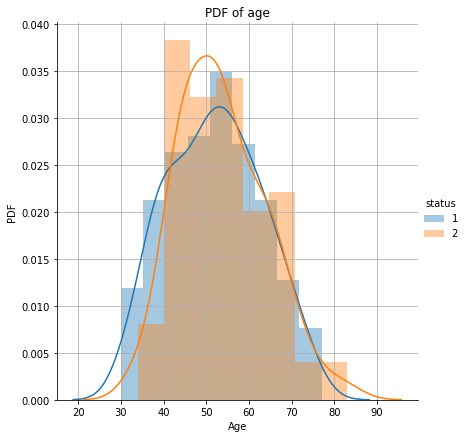

In [11]:
sns.FacetGrid(df, hue='status', size=6).map(sns.distplot, 'age').add_legend()
plt.grid(True)
plt.title('PDF of age')
plt.xlabel('Age')
plt.ylabel('PDF')
plt.show()

## Observations:

- People survived(Class1):
    - Age group of 19 to 88
    - Approx 3.2% people are less than age 52
- People who did not survived (Class2):
    - Age group of 21 to 95
    - Approx 3.7 % people are less than age 50
    

**2.Univariate analysis: Year**

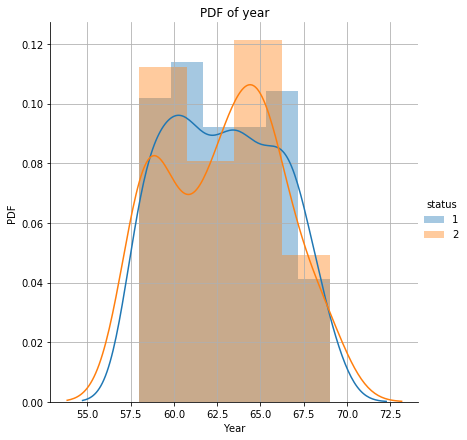

In [12]:
sns.FacetGrid(df, hue='status', size=6).map(sns.distplot, 'year').add_legend()
plt.grid(True)
plt.title('PDF of year')
plt.xlabel('Year')
plt.ylabel('PDF')
plt.show()

## Observations:

- People survived(Class1):
    - Year range is 54 to 71.
    - Approx 9% people has undergone operaton in the year 60.
- People who did not survived (Class2):
    - Year range is 54 to 73.
    - Approx 11% people has undergone operaton in the year 64.
    

**3.Univariate analysis: nodes**

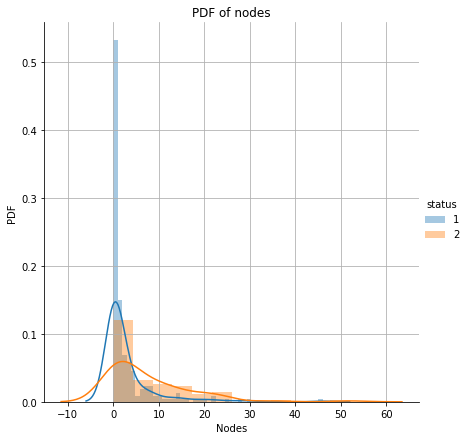

In [13]:
sns.FacetGrid(df, hue='status', size=6).map(sns.distplot, 'nodes').add_legend()
plt.grid(True)
plt.title('PDF of nodes')
plt.xlabel('Nodes')
plt.ylabel('PDF')
plt.show()

## Observations:

- People who survived(Class1):
   - 15% people having 0 nodes.
   - Maximum 0 to 10 nodes are found 
   - for 0 to 20 nodes, as the node increase, the no. of people decrease
   
- People who did not survived(Class2):
    - only 5% people having 0 nodes
    - maximum 0 to 30 nodes are found
    - as the node increse from 0 to 30 , no of people decrease

# CDF

**1.CDF of AGE**


In [14]:
#Grouping status to df1 =survived and df2 =  not survived
df1 = df[df['status']==1]
df2 = df[df['status']==2]
df1

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
298,73,68,0,1
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1


In [15]:
df2

,age,year,nodes,status
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2
...,...,...,...,...
286,70,58,4,2
293,72,63,0,2
299,74,65,3,2
304,78,65,1,2


PDF for age with status 1 is:  [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
PDF for age with status 2 is:  [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]


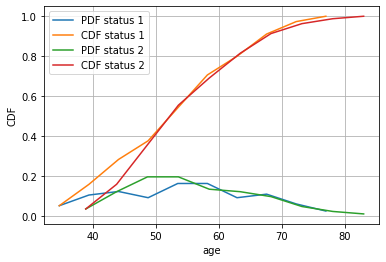

In [16]:
#df1 = survived
counts, bin_edges = np.histogram(df1['age'], bins = 10, density = True)
pdf = counts/sum(counts)
print("PDF for age with status 1 is: ",pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF status 1');
plt.plot(bin_edges[1:], cdf,label='CDF status 1')
plt.grid(True)

#df2 = not survived

counts, bin_edges = np.histogram(df2['age'], bins = 10, density = True)
pdf = counts/sum(counts)
print("PDF for age with status 2 is: ",pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF status 2');
plt.plot(bin_edges[1:], cdf,label='CDF status 2')
plt.xlabel('age')
plt.ylabel('CDF')
plt.grid(True)
plt.legend()

## Observations:

- CDF curve for  both status of survived and not survived intersect at the age of 50 years
- This shows that 40% people who survived are less than 50 years of age
- Also, 40 % people who did not survied are less than 50 years of age.
- After the age of 50 years the CDF curve overlaps
- 80% people who survived and not survived are less than 62 years of age

***2.Year***


PDF for year with status 1 is:  [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
PDF for year with status 2 is:  [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]


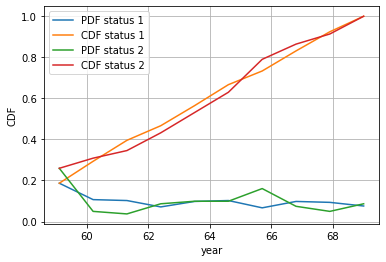

In [17]:
#df1 = survived
counts, bin_edges = np.histogram(df1['year'], bins = 10, density = True)
pdf = counts/sum(counts)
print("PDF for year with status 1 is: ",pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF status 1');
plt.plot(bin_edges[1:], cdf,label='CDF status 1')
plt.grid(True)

#df2 = not survived

counts, bin_edges = np.histogram(df2['year'], bins = 10, density = True)
pdf = counts/sum(counts)
print("PDF for year with status 2 is: ",pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF status 2');
plt.plot(bin_edges[1:], cdf,label='CDF status 2')
plt.xlabel('year')
plt.ylabel('CDF')
plt.grid(True)
plt.legend()

**3.Nodes**


# Observations:


- The CDF curve is almost linear for both the status of survived and not survived
- For Survived(Status=1)
    - 60% people have undergone surgery in less than 64 year
    - only 30% people have undergone surgery less than 60 year
    
- For Not survived(Status=0)
    - 58% people have undergone surgery in less than 64 year
    - only 30% people have undergone surgery less than 60 year

PDF for year with status 1 is:  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
PDF for year with status 2 is:  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]


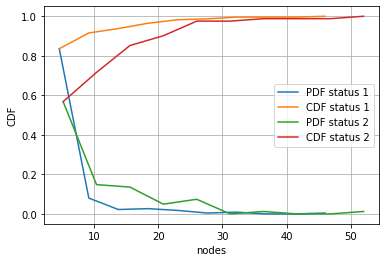

In [18]:
#df1 = survived
counts, bin_edges = np.histogram(df1['nodes'], bins = 10, density = True)
pdf = counts/sum(counts)
print("PDF for year with status 1 is: ",pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF status 1');
plt.plot(bin_edges[1:], cdf,label='CDF status 1')
plt.grid(True)

#df2 = not survived

counts, bin_edges = np.histogram(df2['nodes'], bins = 10, density = True)
pdf = counts/sum(counts)
print("PDF for year with status 2 is: ",pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF status 2');
plt.plot(bin_edges[1:], cdf,label='CDF status 2')
plt.xlabel('nodes')
plt.ylabel('CDF')
plt.grid(True)
plt.legend()

# Observations:

- People survived:
    -90% people are found with 10 nodes.
- People who did not survived:
    -90% people are found with 20 nodes.

# Box Plot and Whiskers

**1.age**

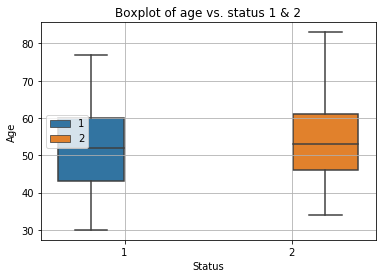

In [20]:
sns.boxplot(x='status', y='age', data=df, hue='status')
plt.title('Boxplot of age vs. status 1 & 2')
plt.xlabel('Status')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

# Observations:

1. People who survided:
    1. 25% of patients have age approx. <= 43 years.
    2. 50% of patients have age approx. <= 52 years.
    3. 75% of patients have age approx. <= 60 years.
2. People who did not survided:
    1. 25% of patients have age approx. <= 46 years.
    2. 50% of patients have age approx. <= 54 years.
    3. 75% of patients have age approx. <= 61 years.

**2.Year**

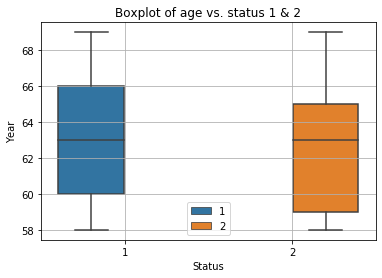

In [22]:
sns.boxplot(x='status', y='year', data=df, hue='status')
plt.title('Boxplot of age vs. status 1 & 2')
plt.xlabel('Status')
plt.ylabel('Year')
plt.legend()
plt.grid(True)
plt.show()

# Observations:

- People who survived:
    - 25% people operated before 60 year
    - 50 % people operated before 63 year
    - 75 % people operated before 66 year
    
- People who did not survived:
    - 25% people operated before 59 year
    - 50 % people operated before 63 year
    - 75 % people operated before 65 year


### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


***3. Nodes ***

- People who survived:
    - 25% people operated before 60 year
    - 50 % people operated before 63 year
    - 75 % people operated before 66 year
    
- People who did not survived:
    - 25% people operated before 59 year
    - 50 % people operated before 63 year
    - 75 % people operated before 65 year


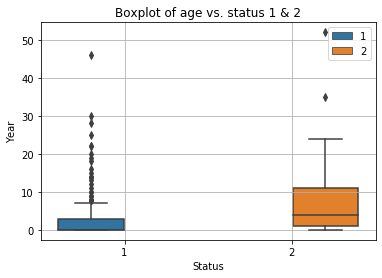

In [23]:
sns.boxplot(x='status', y='nodes', data=df, hue='status')
plt.title('Boxplot of age vs. status 1 & 2')
plt.xlabel('Status')
plt.ylabel('Year')
plt.legend()
plt.grid(True)
plt.show()

# Observations:

- People who survived:
   - 75% people found with less than 5 nodes.
    
  People who did not survived:
    - 50% people found with less than 5 nodes.
    - 75% people found with less than 11 nodes.


# Scatter Plot

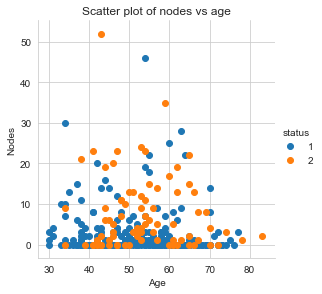

In [25]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'status', size=4).map(plt.scatter, 'age', 'nodes').add_legend()
plt.title('Scatter plot of nodes vs age')
plt.xlabel('Age')
plt.ylabel('Nodes')
plt.show()

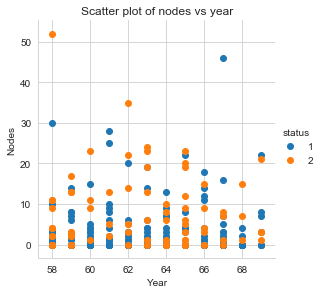

In [26]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'status', size=4).map(plt.scatter, 'year', 'nodes').add_legend()
plt.title('Scatter plot of nodes vs year')
plt.xlabel('Year')
plt.ylabel('Nodes')
plt.show()

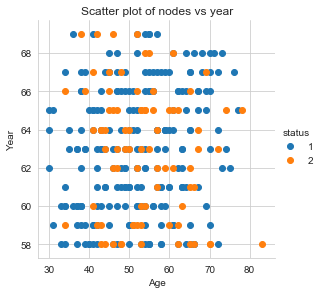

In [27]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'status', size=4).map(plt.scatter, 'age', 'year').add_legend()
plt.title('Scatter plot of nodes vs year')
plt.xlabel('Age')
plt.ylabel('Year')
plt.show()

# Observations:


- All the scatter plot drawn above are not able to provide any separation for the data points that classify status 1 and 2.
- Scatter plot is not useful

# Pair Plot

No handles with labels found to put in legend.


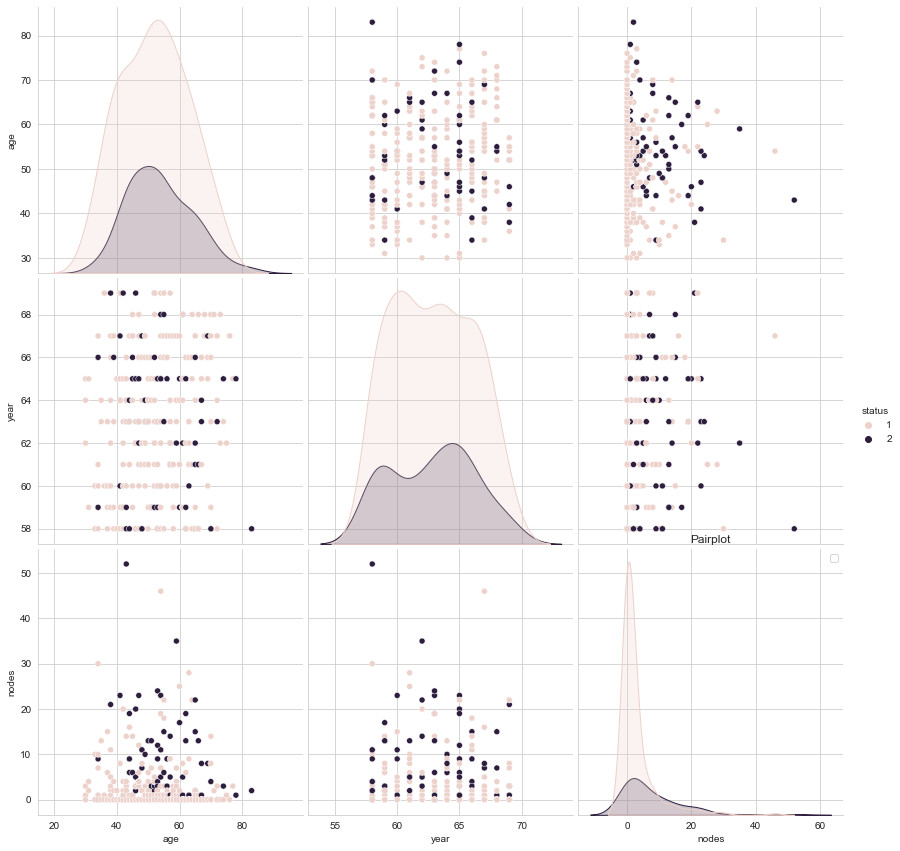

In [29]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='status', vars=['age', 'year', 'nodes'], size=4)
plt.title('Pairplot')
plt.legend()
plt.show()

# Observations

- All the data points are scattered and overlap on the graph.
- These scatter plot is not useful for separations

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

# Final Conclusion:

***PDF***
- Dataset is imbalanced as Survived = 225 and not survuved  = 81

***AGE***

- People survived(Class1):
    - Age group of 19 to 88
    - Approx 3.2% people are less than age 52
- People who did not survived (Class2):
    - Age group of 21 to 95
    - Approx 3.7 % people are less than age 50
    

***Year of operation***
- People survived(Class1):
    - Year range is 54 to 71.
    - Approx 9% people has undergone operaton in the year 60.
- People who did not survived (Class2):
    - Year range is 54 to 73.
    - Approx 11% people has undergone operaton in the year 64.
    

***No.of Nodes***
- People who survived(Class1):
   - 15% people having 0 nodes.
   - Maximum 0 to 10 nodes are found 
   - for 0 to 20 nodes, as the node increase, the no. of people decrease
   
- People who did not survived(Class2):
    - only 5% people having 0 nodes
    - maximum 0 to 30 nodes are found
    - as the node increse from 0 to 30 , no of people decrease
 
***CDF***

***AGE***
- CDF curve for  both status of survived and not survived intersect at the age of 50 years
- This shows that 40% people who survived are less than 50 years of age
- Also, 40 % people who did not survied are less than 50 years of age.
- After the age of 50 years the CDF curve overlaps
- 80% people who survived and not survived are less than 62 years of age

***YEAR***

- For Survived(Status=1)
    - 60% people have undergone surgery in less than 64 year
    - only 30% people have undergone surgery less than 60 year
    
- For Not survived(Status=0)
    - 58% people have undergone surgery in less than 64 year
    - only 30% people have undergone surgery less than 60 year
    
***NODES***

- People survived:
    -90% people are found with 10 nodes.
- People who did not survived:
    -90% people are found with 20 nodes.
    
***Pair plot and scatter plot features are not useful for classification of points to status1 and status2.    
    